# Disaster Prone Area Classification

In [1]:
# import the necessary libraries
import pandas as pd
import numpy as np
import random

In [2]:
# Seed for reproducibility
np.random.seed(42)

# Sample Indian states
states = ['Bihar', 'Uttar Pradesh', 'West Bengal', 'Assam', 'Gujarat', 'Maharashtra', 
          'Tamil Nadu', 'Kerala', 'Odisha', 'Andhra Pradesh', 'Punjab', 'Rajasthan', 
          'Madhya Pradesh', 'Jharkhand', 'Chhattisgarh', 'Karnataka', 'Haryana', 'Delhi']

# Function to create one record
def generate_row():
    state = random.choice(states)
    latitude = round(np.random.uniform(8.0, 37.0), 4)
    longitude = round(np.random.uniform(68.0, 97.0), 4)
    elevation = np.random.randint(0, 3000)  # meters
    disaster_score = np.random.randint(0, 10)
    population_density = np.random.randint(50, 3000)
    urbanization_level = np.random.randint(1, 11)
    house_affected = np.random.randint(0, 50000)
    human_death = np.random.randint(0, 1000)

    # Compute a simple risk score
    risk_score = disaster_score + (population_density // 1000) + \
                 (house_affected // 10000) + (human_death // 100)
    
    if risk_score >= 10:
        risk_label = 'High'
    elif 5 <= risk_score < 10:
        risk_label = 'Medium'
    else:
        risk_label = 'Low'

    return [state, latitude, longitude, elevation, disaster_score, population_density,
            urbanization_level, house_affected, human_death, risk_label]

# Generate 5000 records
data = [generate_row() for _ in range(5000)]

# Create DataFrame
columns = ['State', 'Latitude', 'Longitude', 'Elevation', 'Disaster_History_Score',
           'Population_Density', 'Urbanization_Level', 'House_Affected', 'Human_Death', 'Disaster_Risk_Label']

df = pd.DataFrame(data, columns=columns)

# Save the dataset
df.to_csv("disaster_prone_area_dataset.csv", index=False)
print("✅ Dataset saved as 'disaster_prone_area_dataset.csv'")


✅ Dataset saved as 'disaster_prone_area_dataset.csv'


In [3]:
df.head()

,State,Latitude,Longitude,Elevation,Disaster_History_Score,Population_Density,Urbanization_Level,House_Affected,Human_Death,Disaster_Risk_Label
0,Delhi,18.8617,95.5707,1130,7,1688,10,16850,214,High
1,Gujarat,9.6844,93.1191,2919,7,180,6,769,343,High
2,Tamil Nadu,32.1408,74.1578,1215,4,1234,10,28693,252,Medium
3,Kerala,20.5264,76.4456,1082,9,2097,3,1899,566,High
4,Gujarat,36.5137,81.5361,646,4,2938,7,21777,387,High


In [4]:
# describe the dataset
df.describe()

,Latitude,Longitude,Elevation,Disaster_History_Score,Population_Density,Urbanization_Level,House_Affected,Human_Death
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,22.496568,82.488012,1507.277400,4.585000,1543.631800,5.562400,24966.602000,500.951400
std,8.489479,8.363261,867.767494,2.877643,853.193552,2.853653,14424.590537,288.147699
min,8.003900,68.003600,1.000000,0.000000,50.000000,1.000000,2.000000,0.000000
25%,15.112000,75.338525,749.000000,2.000000,817.750000,3.000000,12185.250000,249.000000
50%,22.646750,82.588000,1511.500000,5.000000,1545.000000,6.000000,24937.500000,500.000000
75%,29.747025,89.676425,2260.000000,7.000000,2294.250000,8.000000,37410.250000,753.000000
max,36.984600,96.994300,2999.000000,9.000000,2999.000000,10.000000,49999.000000,999.000000


In [5]:
# data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   5000 non-null   object 
 1   Latitude                5000 non-null   float64
 2   Longitude               5000 non-null   float64
 3   Elevation               5000 non-null   int64  
 4   Disaster_History_Score  5000 non-null   int64  
 5   Population_Density      5000 non-null   int64  
 6   Urbanization_Level      5000 non-null   int64  
 7   House_Affected          5000 non-null   int64  
 8   Human_Death             5000 non-null   int64  
 9   Disaster_Risk_Label     5000 non-null   object 
dtypes: float64(2), int64(6), object(2)
memory usage: 390.8+ KB


In [6]:
df.shape

(5000, 10)

# Exploratory Data Analysis

In [7]:
# Check for missing values
df.isnull().sum()


State                     0
Latitude                  0
Longitude                 0
Elevation                 0
Disaster_History_Score    0
Population_Density        0
Urbanization_Level        0
House_Affected            0
Human_Death               0
Disaster_Risk_Label       0
dtype: int64

# Distribution of Disaster Risk Labels

C:\Users\asus\AppData\Local\Temp\ipykernel_9804\2950394254.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Disaster_Risk_Label', palette='Set2')


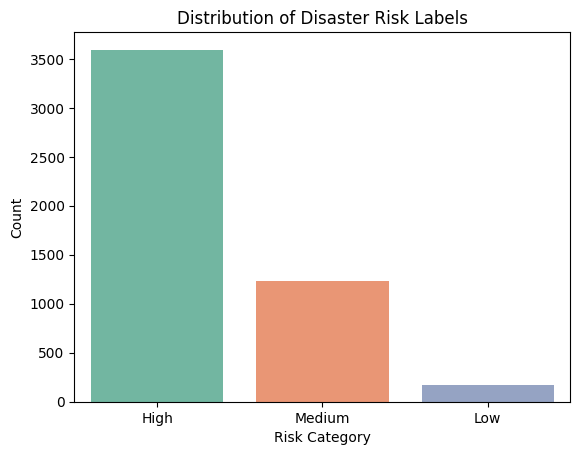

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
# Count plot for disaster risk labels
sns.countplot(data=df, x='Disaster_Risk_Label', palette='Set2')
plt.title("Distribution of Disaster Risk Labels")
plt.xlabel("Risk Category")
plt.ylabel("Count")
plt.show()


# Distribution of States in Dataset

C:\Users\asus\AppData\Local\Temp\ipykernel_9804\1515887913.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='State', order=df['State'].value_counts().index, palette='coolwarm')


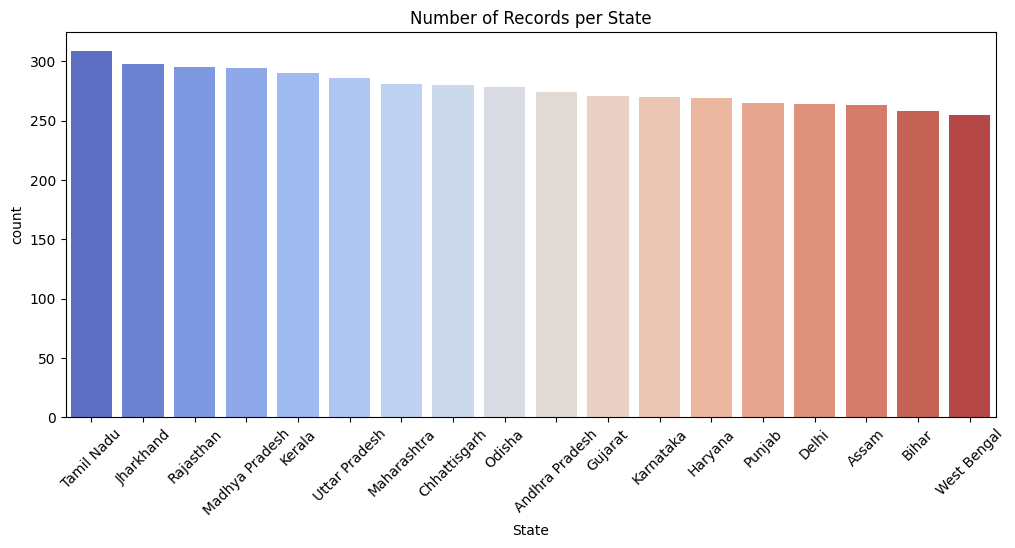

In [9]:
# Count plot for states
plt.figure(figsize=(12,5))
sns.countplot(data=df, x='State', order=df['State'].value_counts().index, palette='coolwarm')
plt.title("Number of Records per State")
plt.xticks(rotation=45)
plt.show()


In [10]:
from sklearn.preprocessing import LabelEncoder
df_encoded = df.copy()

# Encode 'State' and 'Disaster_Risk_Label'
le_state = LabelEncoder()
le_label = LabelEncoder()

df_encoded['State'] = le_state.fit_transform(df_encoded['State'])
df_encoded['Disaster_Risk_Label'] = le_label.fit_transform(df_encoded['Disaster_Risk_Label'])


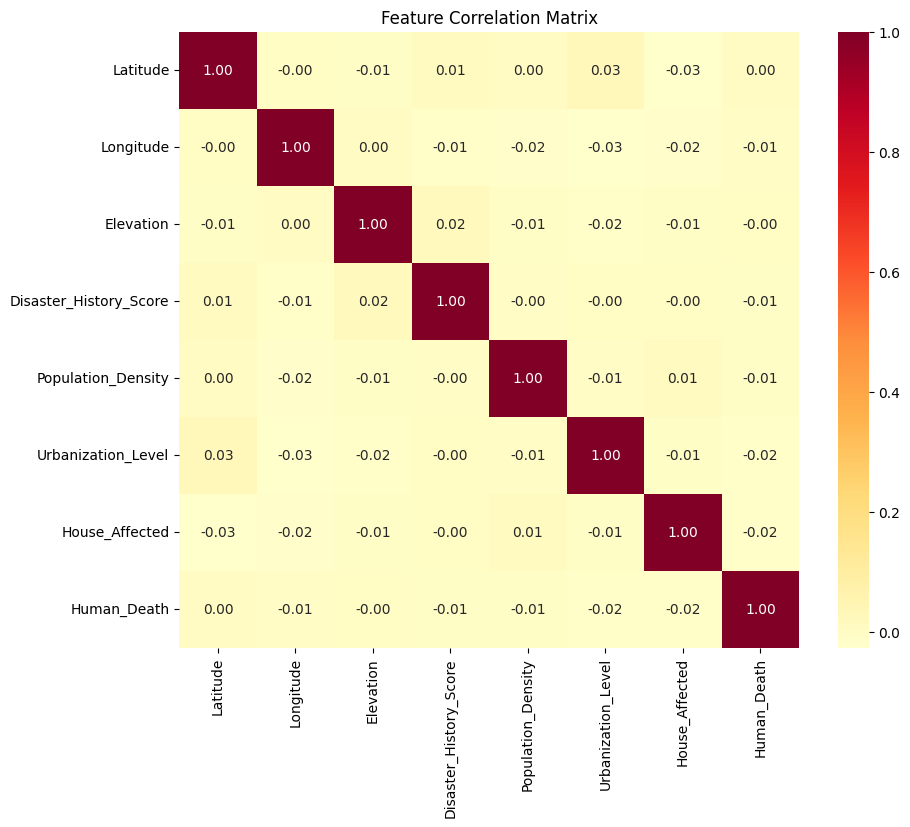

In [11]:
# Select only numeric columns for correlation
df_numeric = df.select_dtypes(include=['float64', 'int64'])

# Calculate correlation
plt.figure(figsize=(10, 8))
sns.heatmap(df_numeric.corr(), annot=True, cmap='YlOrRd', fmt='.2f')
plt.title("Feature Correlation Matrix")
plt.show()

In [12]:
df = pd.get_dummies(df, columns=['State'], prefix='State')


In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Select only numeric columns
df_numeric = df.select_dtypes(include=['float64', 'int64'])

# Step 2: Compute correlation matrix
corr_matrix = df_numeric.corr()

# Step 3: Remove columns with any negative correlation
filtered_corr = corr_matrix.loc[:, (corr_matrix >= 0).all()]

# Step 4: Check if it's empty before plotting
if filtered_corr.empty:
    print("No columns with only non-negative correlation found.")
else:
    plt.figure(figsize=(10, 8))
    sns.heatmap(filtered_corr, annot=True, cmap='YlOrRd', fmt='.2f')
    plt.title("Feature Correlation Matrix (Negative Correlations Removed)")
    plt.show()


No columns with only non-negative correlation found.


#  Pairplot for Visualizing Trends

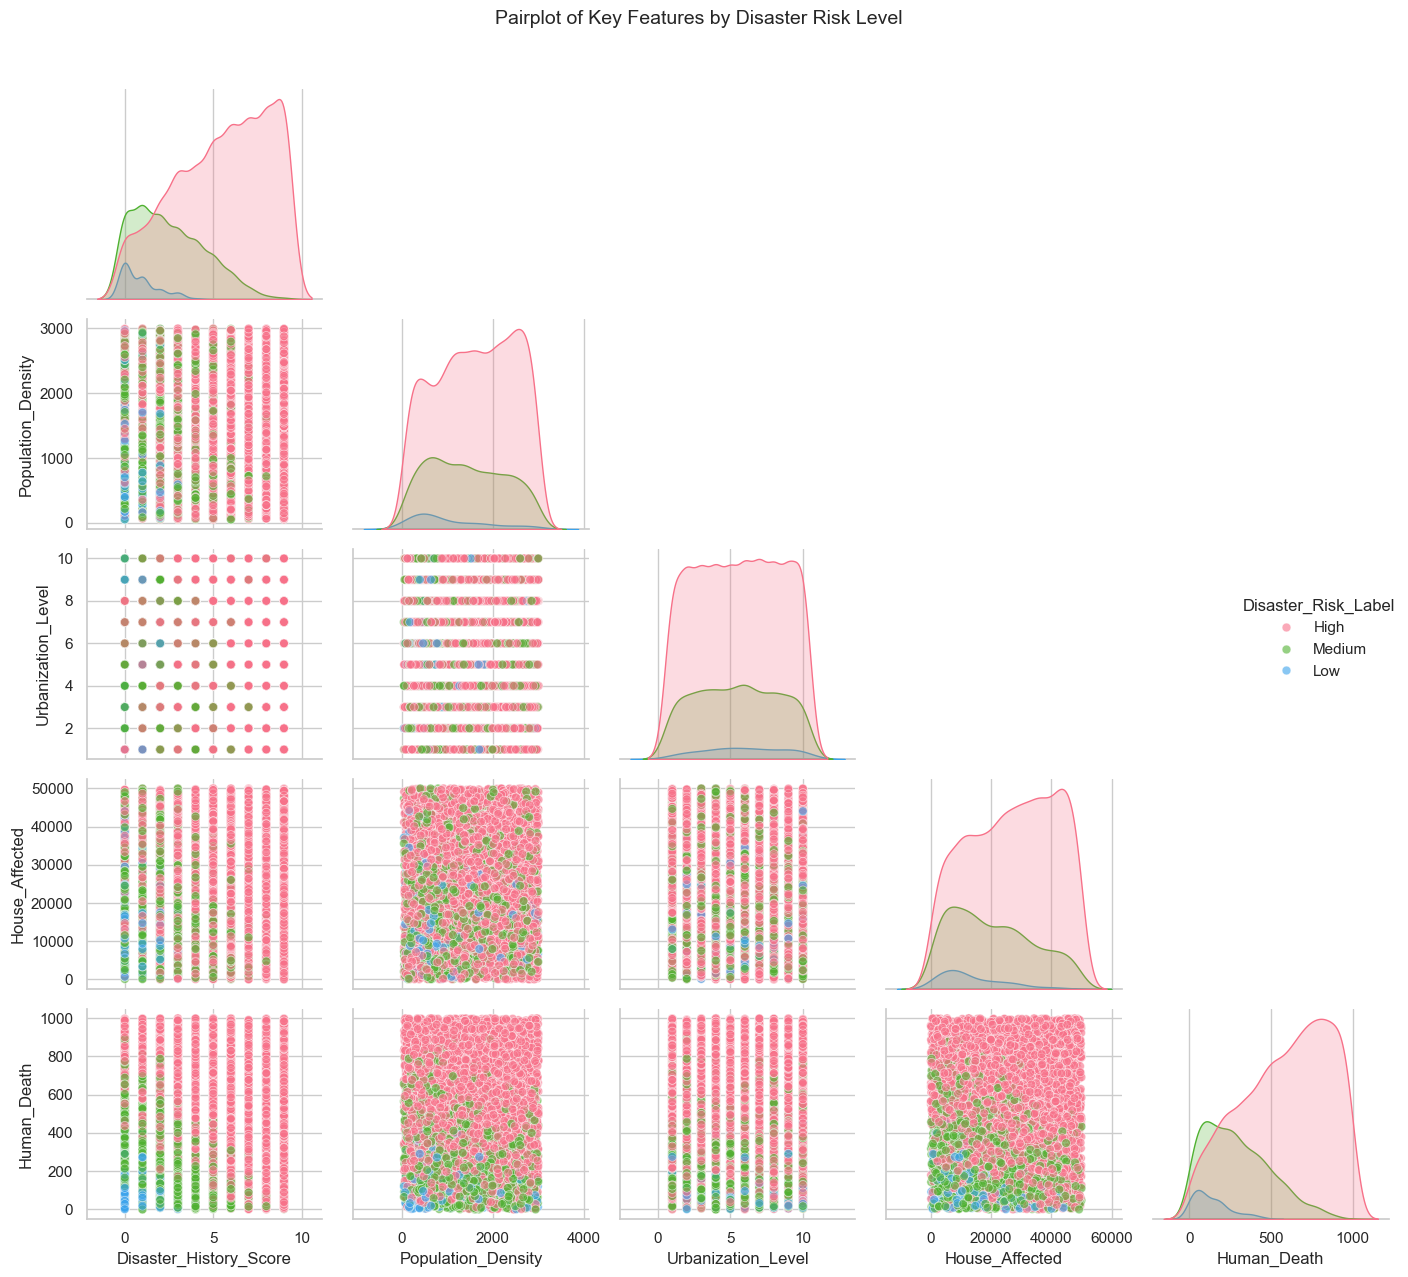

In [16]:
# Set style
sns.set(style="whitegrid")

# Define features
features = ['Disaster_History_Score', 'Population_Density', 'Urbanization_Level',
            'House_Affected', 'Human_Death', 'Disaster_Risk_Label']

# Make sure 'Disaster_Risk_Label' is string type for hue
df['Disaster_Risk_Label'] = df['Disaster_Risk_Label'].astype(str)

# Create pairplot
pairplot = sns.pairplot(
    df[features],
    hue='Disaster_Risk_Label',
    palette='husl',
    diag_kind='kde',
    corner=True,
    plot_kws={'alpha': 0.6, 's': 40}
)

# Add title
pairplot.fig.suptitle("Pairplot of Key Features by Disaster Risk Level", y=1.02, fontsize=14)
plt.tight_layout()
plt.show()

C:\Users\asus\AppData\Local\Temp\ipykernel_9804\1489229123.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Disaster_Risk_Label', y='Population_Density', palette='Set3')


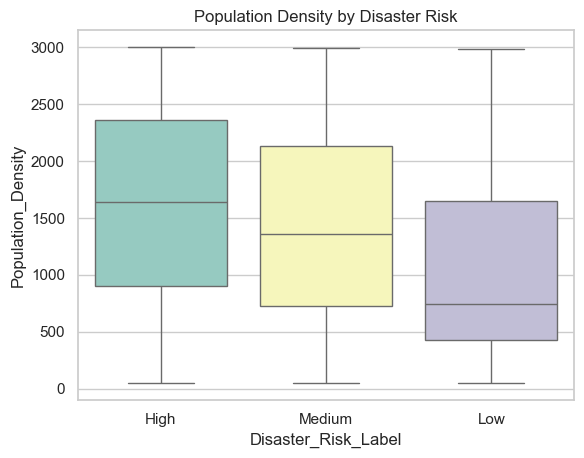

In [17]:
# Boxplot for detecting outlier
sns.boxplot(data=df, x='Disaster_Risk_Label', y='Population_Density', palette='Set3')
plt.title("Population Density by Disaster Risk")
plt.show()


C:\Users\asus\AppData\Local\Temp\ipykernel_9804\3959188376.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Disaster_Risk_Label', y='House_Affected', palette='Set1')


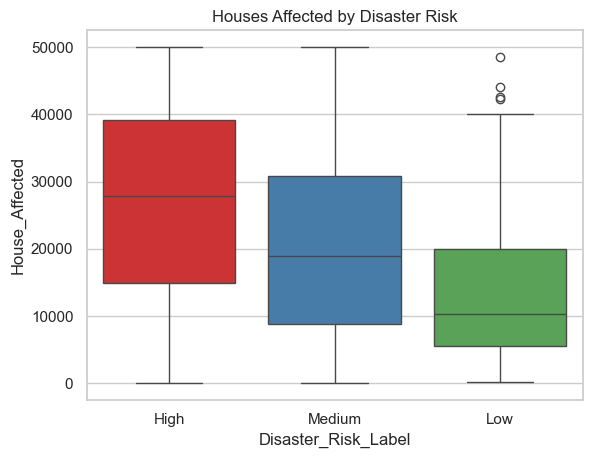

In [18]:
# House Affected by Risk
sns.boxplot(data=df, x='Disaster_Risk_Label', y='House_Affected', palette='Set1')
plt.title("Houses Affected by Disaster Risk")
plt.show()


In [21]:
def cap_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[column] = df[column].clip(lower=lower_bound, upper=upper_bound)
    return df


In [24]:
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]


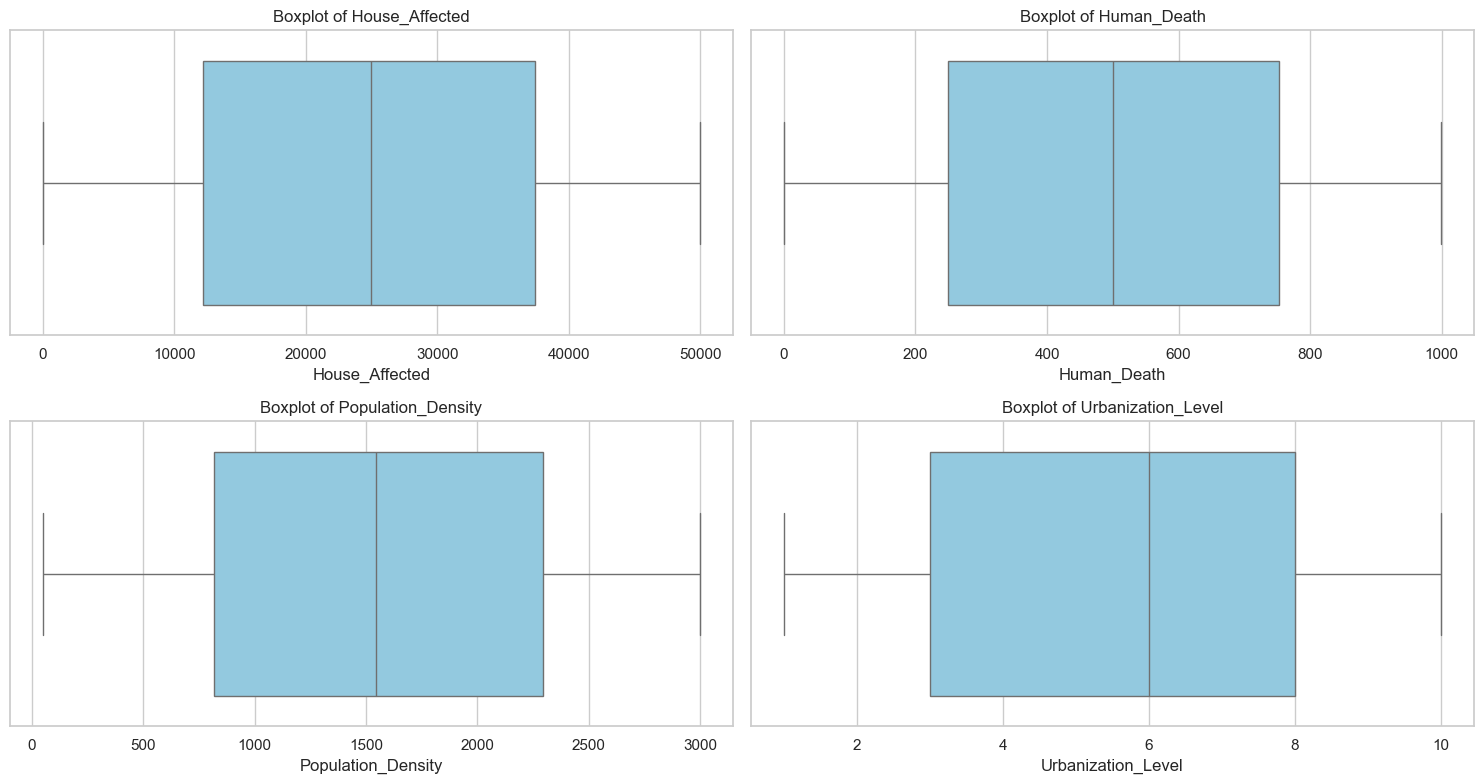

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot boxplots for each numerical column
numerical_columns = ['House_Affected', 'Human_Death', 'Population_Density', 'Urbanization_Level']
plt.figure(figsize=(15, 8))

for i, col in enumerate(numerical_columns):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(x=df[col], color='skyblue')
    plt.title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()


# Feature Engineering

In [28]:
from sklearn.preprocessing import LabelEncoder

# Feature Engineering
df['Risk_Index'] = df['Disaster_History_Score'] * 0.5 + df['Population_Density'] * 0.3 + df['Urbanization_Level'] * 0.2
df['Damage_Scale'] = df['House_Affected'] + (df['Human_Death'] * 10)  # deaths are weighted more

# Encode labels
le = LabelEncoder()
df['Risk_Label_Code'] = le.fit_transform(df['Disaster_Risk_Label'])

# Final features
features = ['Disaster_History_Score', 'Population_Density', 'Urbanization_Level',
            'House_Affected', 'Human_Death', 'Risk_Index', 'Damage_Scale']
X = df[features]
y = df['Risk_Label_Code']


# Model Training

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.98      0.97      1073
           1       0.98      0.65      0.78        62
           2       0.89      0.88      0.89       365

    accuracy                           0.95      1500
   macro avg       0.94      0.84      0.88      1500
weighted avg       0.95      0.95      0.94      1500

Confusion Matrix:
 [[1056    0   17]
 [   0   40   22]
 [  41    1  323]]


In [32]:
print(df.columns.tolist())

['Latitude', 'Longitude', 'Elevation', 'Disaster_History_Score', 'Population_Density', 'Urbanization_Level', 'House_Affected', 'Human_Death', 'Disaster_Risk_Label', 'State_Andhra Pradesh', 'State_Assam', 'State_Bihar', 'State_Chhattisgarh', 'State_Delhi', 'State_Gujarat', 'State_Haryana', 'State_Jharkhand', 'State_Karnataka', 'State_Kerala', 'State_Madhya Pradesh', 'State_Maharashtra', 'State_Odisha', 'State_Punjab', 'State_Rajasthan', 'State_Tamil Nadu', 'State_Uttar Pradesh', 'State_West Bengal', 'Risk_Index', 'Damage_Scale', 'Risk_Label_Code']


In [41]:
pip install geopy

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Latitude                5000 non-null   float64
 1   Longitude               5000 non-null   float64
 2   Elevation               5000 non-null   int64  
 3   Disaster_History_Score  5000 non-null   int64  
 4   Population_Density      5000 non-null   int64  
 5   Urbanization_Level      5000 non-null   int64  
 6   House_Affected          5000 non-null   int64  
 7   Human_Death             5000 non-null   int64  
 8   Disaster_Risk_Label     5000 non-null   object 
 9   State_Andhra Pradesh    5000 non-null   bool   
 10  State_Assam             5000 non-null   bool   
 11  State_Bihar             5000 non-null   bool   
 12  State_Chhattisgarh      5000 non-null   bool   
 13  State_Delhi             5000 non-null   bool   
 14  State_Gujarat           5000 non-null   

In [48]:
import folium
from folium.plugins import MarkerCluster

# Initialize map centered around India
m = folium.Map(location=[22.5937, 78.9629], zoom_start=5, tiles='CartoDB positron')

# Define a function to get marker color based on the disaster risk label
def get_marker_color(risk_label):
    """Assigns a color based on the disaster risk label."""
    if risk_label == 'High':
        return 'red'
    elif risk_label == 'Medium':
        return 'orange'
    else:
        return 'green'

# Add markers to the map using MarkerCluster for better map interaction
marker_cluster = MarkerCluster().add_to(m)

# Loop over each row in the dataset
for i, row in df.iterrows():
    # Check if latitude and longitude are available, also ensure disaster risk label exists
    if pd.notnull(row['Latitude']) and pd.notnull(row['Longitude']) and pd.notnull(row['Disaster_Risk_Label']):
        # Identify the states associated with the current row
        states = [state for state in df.columns[9:-3] if row[state] == True]
        
        if states:
            # Create the popup content to display
            popup_content = f"""
                <b>State(s):</b> {', '.join(states)}<br>
                <b>Disaster Risk Label:</b> {row['Disaster_Risk_Label']}<br>
                <b>Population Density:</b> {row['Population_Density']}<br>
                <b>Urbanization Level:</b> {row['Urbanization_Level']}<br>
                <b>House Affected:</b> {row['House_Affected']}<br>
                <b>Human Deaths:</b> {row['Human_Death']}<br>
                <b>Risk Index:</b> {row['Risk_Index']}
            """
        
            # Add the marker to the map
            folium.Marker(
                location=[row['Latitude'], row['Longitude']],
                popup=folium.Popup(popup_content, max_width=300),
                icon=folium.Icon(color=get_marker_color(row['Disaster_Risk_Label']))
            ).add_to(marker_cluster)

# Save the map to an HTML file
m.save("disaster_risk_map.html")


# Deploy the model

In [49]:
import joblib

# Save your trained model
joblib.dump(model, 'disaster_model.pkl')


['disaster_model.pkl']